<h1>Objectives</h1><br>
<i
  >Commercial banks receive a lot of applications for credit cards. Many of
  them get rejected for many reasons, like high loan balances, low income
  levels, or too many inquiries on an individual's credit report, for
  example.<br> Manually analyzing these applications is mundane, error-prone,
  and time-consuming (and time is money!).<br> Luckily, this task can be
  automated with the power of machine learning and pretty much every
  commercial bank does so nowadays</i
>

In [3]:
import pandas as pd #Importing pandas 
names = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus']
#Loading the dataset taken from UCI ML data repository into the dataFrame named cc_apps.
#Since the dataset has no headers, we set header = None to specify pandas that the dataset has no header.
cc_apps = pd.read_csv("crx.data", names= names) 

cc_apps.head(5)
#Since it's a sensitive dataset, The Values in the dataset have been changed to meaniningless characters.
#We don't need original values as such to classify though.

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


<p>
  The probable features in a typical credit card application are -
</p>
<ul>
  <li>Gender</li>
  <li>Age</li>
  <li>Debt</li>
  <li>Married</li>
  <li>BankCustomer</li>
  <li>EducationLevel</li>
  <li>Ethnicity</li>
  <li>YearsEmployed</li>
  <li>PriorDefault</li>
  <li>Employed</li>
  <li>CreditScore</li>
  <li>DriversLicense</li>
  <li>Citizen</li>
  <li>ZipCode</li>
  <li>Income</li>
  <li>ApprovalStatus</li>
</ul>


In [4]:
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object


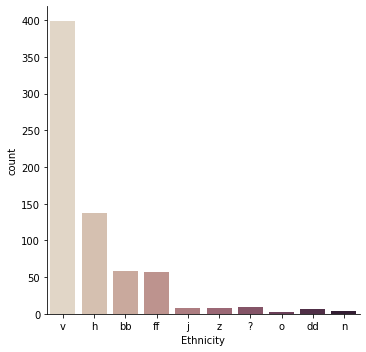

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x = 'Ethnicity', kind = "count", palette = "ch: 0.25", data = cc_apps)
#We can see that different types of ethnic people that apply. This class is ruled by "v"

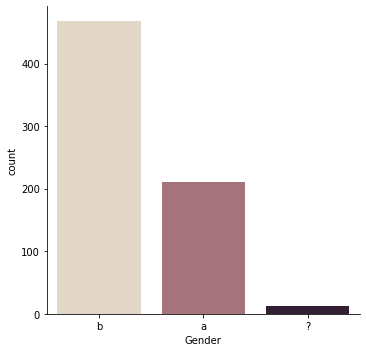

In [6]:
sns.catplot(x = 'Gender', kind = "count", palette = "ch: 0.25", data = cc_apps)
#different genders that apply. b is probabaly male and a is female.

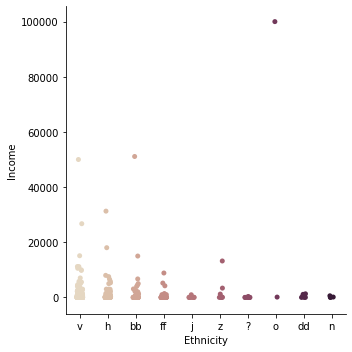

In [7]:
sns.catplot(x = 'Ethnicity',y = 'Income', palette = "ch: 0.25", data = cc_apps)

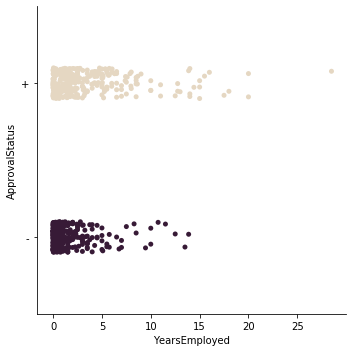

In [11]:
sns.catplot(x = 'YearsEmployed', y = 'ApprovalStatus', palette = "ch: 0.25", data = cc_apps)


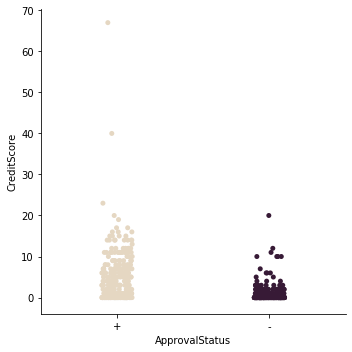

In [14]:
sns.catplot(x = 'ApprovalStatus',y = 'CreditScore', palette = "ch: 0.25", data = cc_apps)

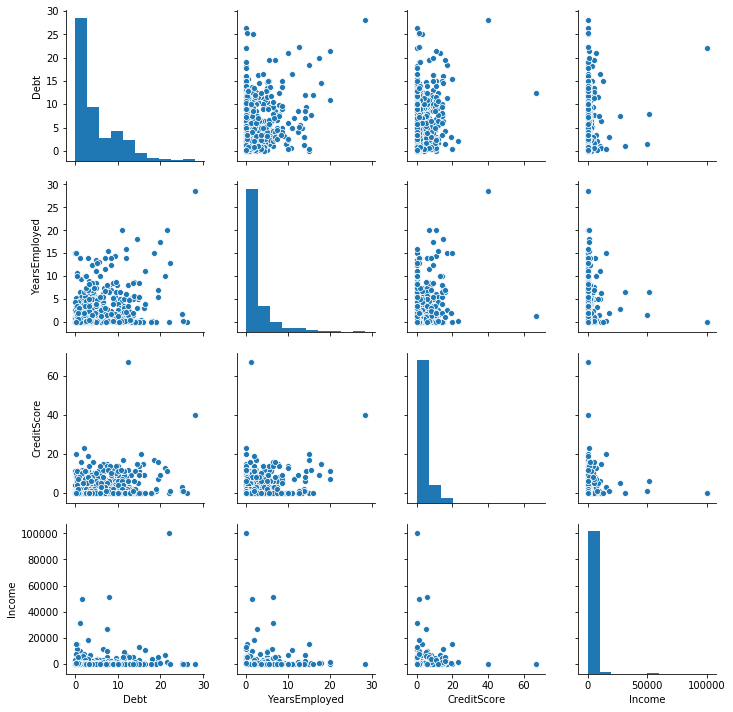

In [12]:
sns.pairplot(cc_apps)

<h1><b>Handling Missing Values</b></h1>
<ul>
  <li>
    Our dataset contains both numeric and non-numeric data (specifically
    data that are of float64, int64 and object types). Specifically, the
    features 2, 7, 10 and 14 contain numeric values (of types float64,
    float64, int64 and int64 respectively) and all the other features
    contain non-numeric values.
  </li>
  <li>
    The missing values in the dataset are labeled with '?', which
    can be seen in the last cell's output.
  </li>
</ul>
</p>Let's replace the ? by Nan for ease of computation.</p>

In [13]:
# Import numpy
# ... YOUR CODE FOR TASK 3 ...
import numpy as np
# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace(['?'], np.NaN)

# Inspect the missing values again
print(cc_apps.tail(17))
# ... YOUR CODE FOR TASK 3 ...

    Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
673      ?  29.50   2.000       y            p              e         h   
674      a  37.33   2.500       u            g              i         h   
675      a  41.58   1.040       u            g             aa         v   
676      a  30.58  10.665       u            g              q         h   
677      b  19.42   7.250       u            g              m         v   
678      a  17.92  10.210       u            g             ff        ff   
679      a  20.08   1.250       u            g              c         v   
680      b  19.50   0.290       u            g              k         v   
681      b  27.83   1.000       y            p              d         h   
682      b  17.08   3.290       u            g              i         v   
683      b  36.42   0.750       y            p              d         v   
684      b  40.58   3.290       u            g              m         v   
685      b  21.08  10.085

<p>We will replace the Nan values with the mean of that particular column.</p>

In [14]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
pd.isna(cc_apps)
cc_apps.tail()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [15]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.count())
cc_apps.tail(20)

Gender            690
Age               690
Debt              690
Married           690
BankCustomer      690
EducationLevel    690
Ethnicity         690
YearsEmployed     690
PriorDefault      690
Employed          690
CreditScore       690
DriversLicense    690
Citizen           690
ZipCode           690
Income            690
ApprovalStatus    690
dtype: int64


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [16]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# ... YOUR CODE FOR TASK 6 ...

# Instantiate LabelEncoder
le = LabelEncoder()
# ... YOUR CODE FOR TASK 6 ...

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# ... YOUR CODE FOR TASK 7 ...

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

In [19]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# ... YOUR CODE FOR TASK 8 ...

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [20]:
# Instantiate a LogisticRegression classifier with default parameter values
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.7898550724637681
[[51 19]
 [10 58]]


In [22]:
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [23]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(X, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best: 0.836232 using {'max_iter': 150, 'tol': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [ ]:
f